In [5]:
from pathlib import Path
from utils import new_graph, print_graph

In [ ]:
file = Path.cwd() / "data" / "Email-Enron.txt"

g = new_graph(file)

In [ ]:
print_graph(g)

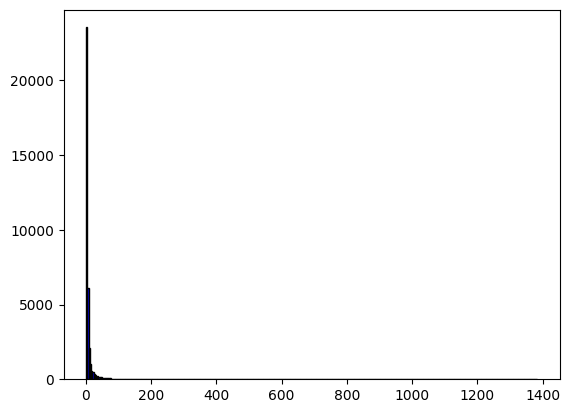

In [10]:
import matplotlib.pyplot as plt

qty_edges = lambda x : int(x.size() / 2)

data = [qty_edges(g.adj[i]) for i in range(g.V)]

plt.hist(data, bins=g.V//100, color='blue', edgecolor='black')

plt.show()